# **E-Commerce Clustering**

**By: Ayemhenre Isikhuemhen**  
**November 10, 2025**  

**File Descirption:** This a jupyter notebook file used to store and organize the code used during my project using an e-commerce dataset provide by METHOD Consulting to explore and test out Clustering Algorithms.

## Setup

In [87]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

# Visualizations Style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

## Initial Data Exploration

In [88]:
# Load and Data Clean Up
df = pd.read_csv(r'C:\Users\Owner\Documents\GitHub\E-Commerce-Clustering\Data Files\dohtem_ecommerce_customers.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

# Check for basic information
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Get summary statistics
print("\nSummary Statistics:")
df.describe().T


Dataset Shape: (5630, 20)

First few rows:

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus     

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.5,54222.75,55630.0
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0,0.00,1.0
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.0,16.00,61.0
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0,3.00,3.0
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.0,20.00,127.0
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.0,3.00,5.0
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.0,4.00,6.0
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.0,4.00,5.0
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.0,6.00,22.0
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0,1.00,1.0


## Visualizations

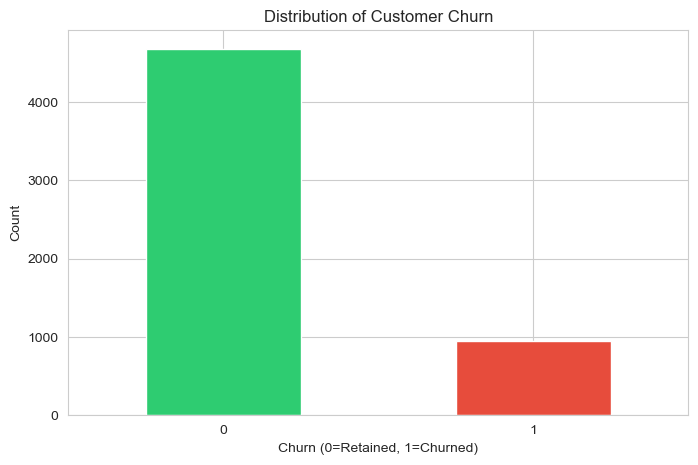

In [89]:
# Check distribution of churn (our reference label)
plt.figure(figsize=(8, 5))
df['Churn'].value_counts().plot(kind='bar', color=['#2ecc71', '#e74c3c'])
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0=Retained, 1=Churned)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

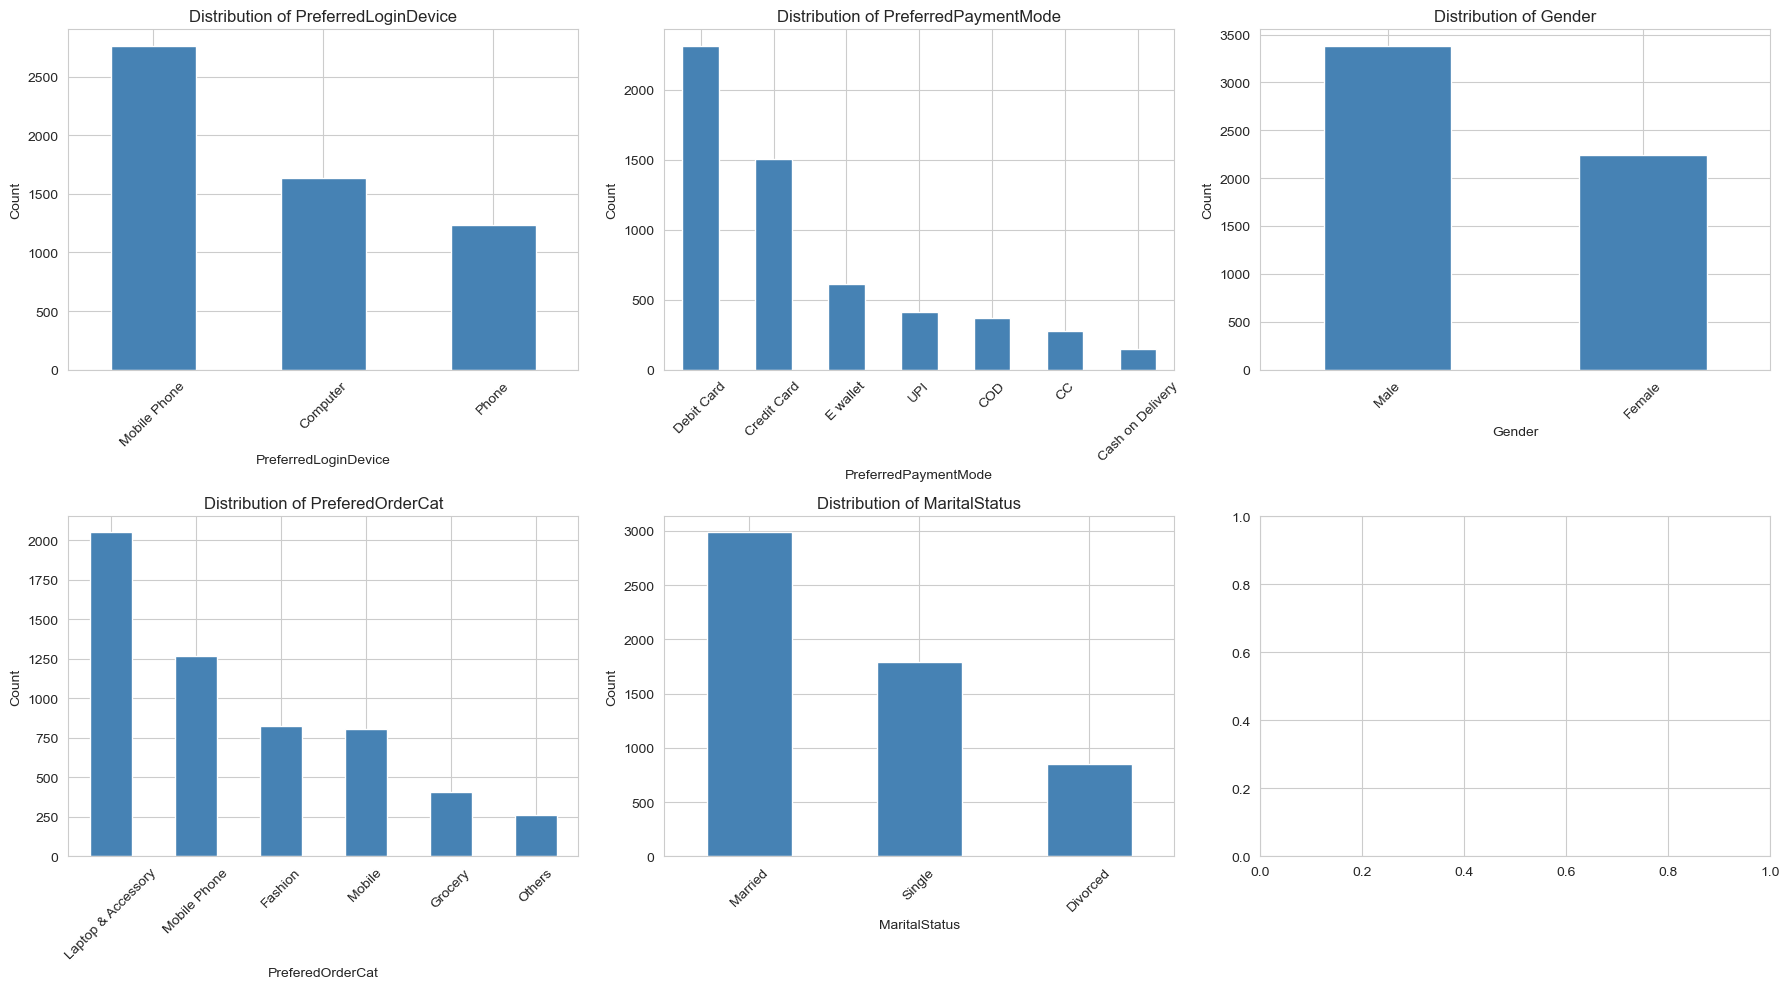

In [90]:
# Examine categorical features
categorical_cols = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 
                   'PreferedOrderCat', 'MaritalStatus']

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.flatten()

for idx, col in enumerate(categorical_cols):
    if col in df.columns:
        df[col].value_counts().plot(kind='bar', ax=axes[idx], color='steelblue')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Count')
        axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

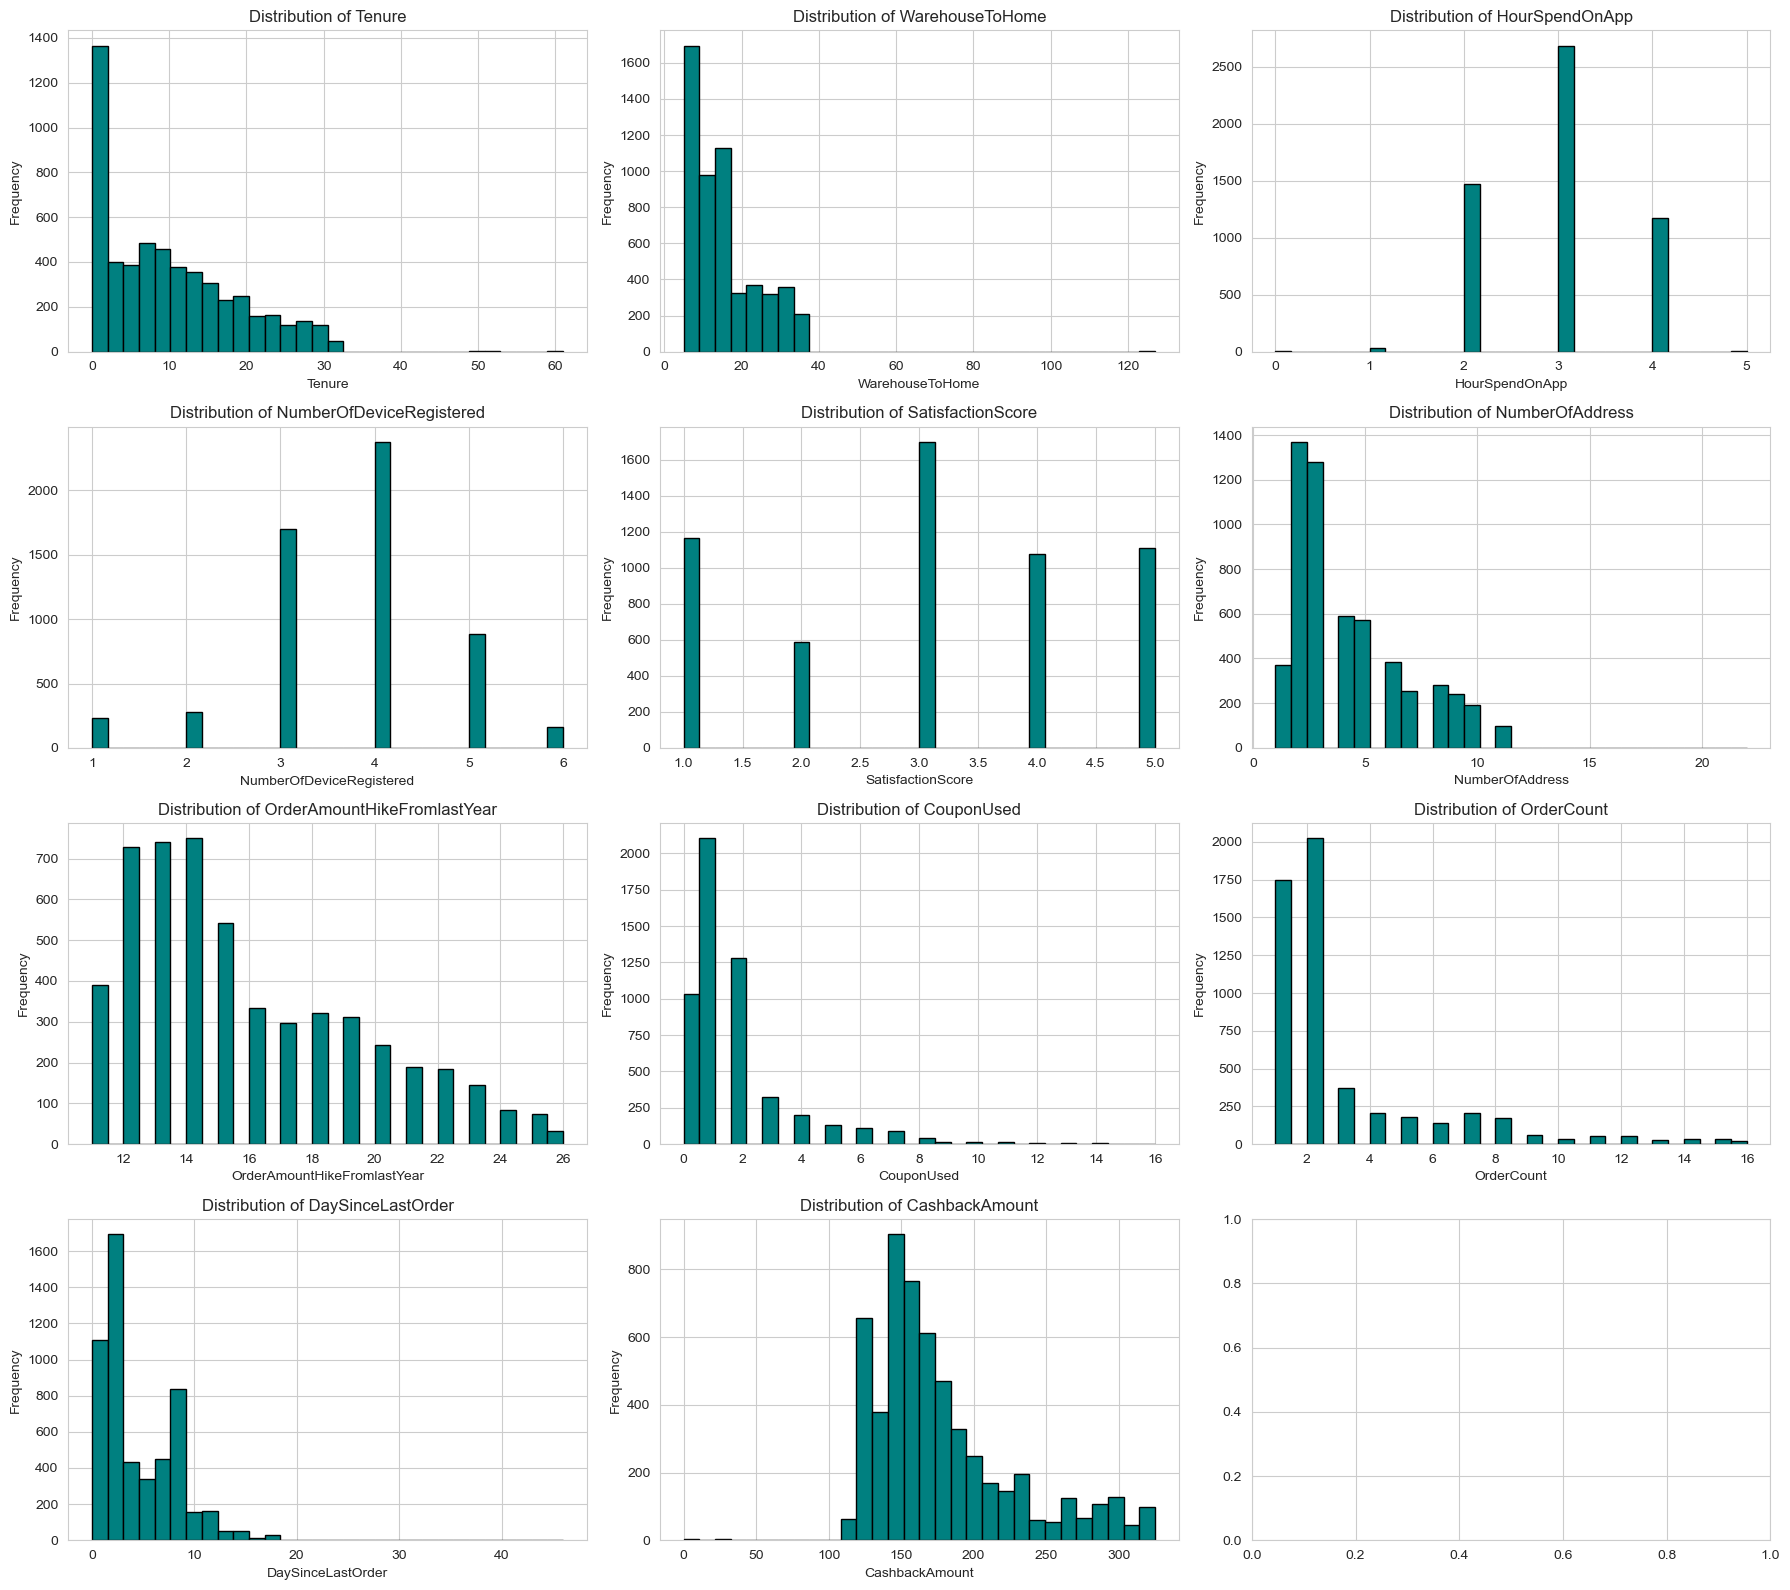

In [91]:
# Examine numerical features distribution
numerical_cols = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
                 'SatisfactionScore', 'NumberOfAddress', 'OrderAmountHikeFromlastYear',
                 'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount']

fig, axes = plt.subplots(4, 3, figsize=(18, 16))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    if col in df.columns:
        axes[idx].hist(df[col].dropna(), bins=30, color='teal', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

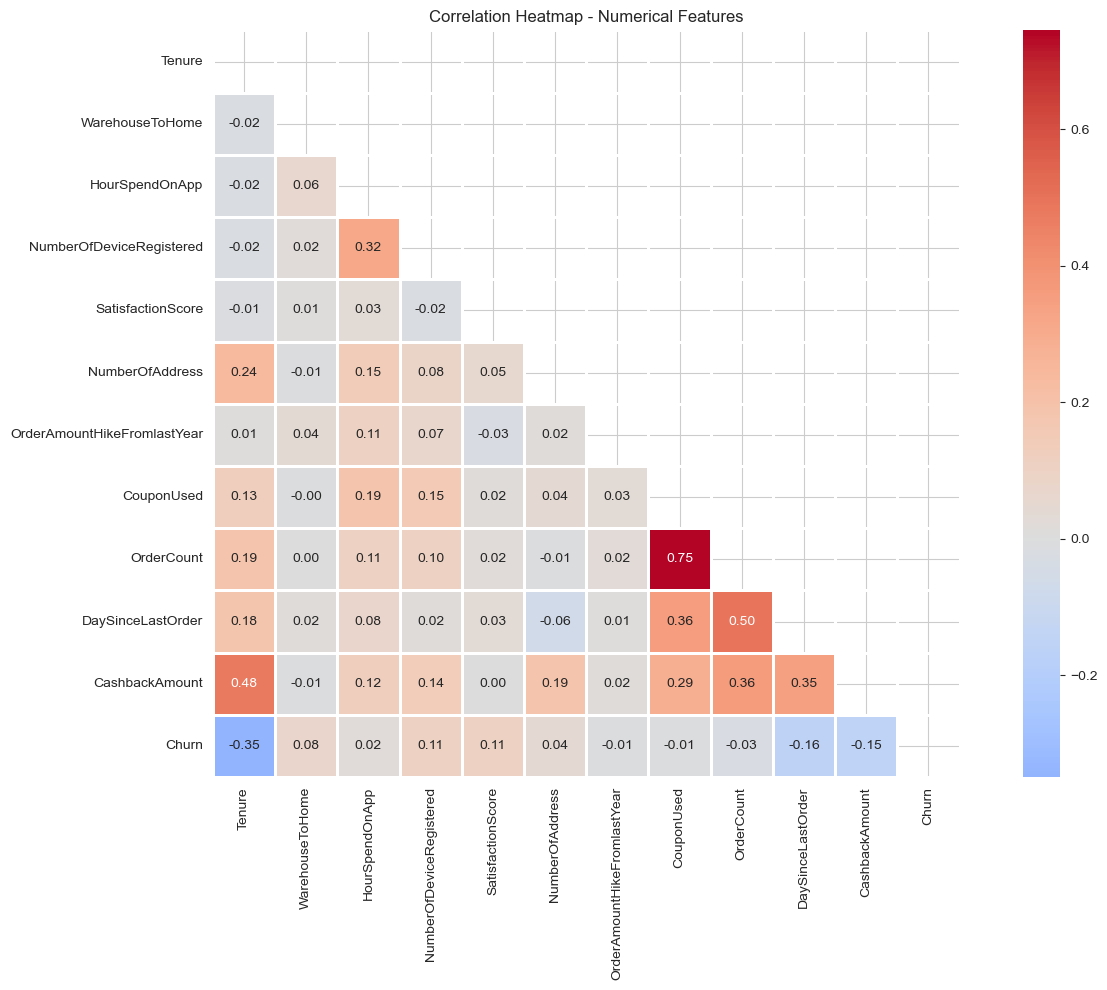

In [92]:
# Correlation heatmap for numerical features
numerical_df = df[numerical_cols + ['Churn']].select_dtypes(include=[np.number])
corr_matrix = numerical_df.corr()

plt.figure(figsize=(14, 10))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1)
plt.title('Correlation Heatmap - Numerical Features')
plt.tight_layout()
plt.show()

## Preprocessing for Clustering

In [93]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop CustomerID as it's just an identifier
df_processed = df_processed.drop(columns=['CustomerID'])

# For numerical columns, fill with median
for col in numerical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna(df_processed[col].median())

# For categorical columns, fill with mode
for col in categorical_cols:
    if col in df_processed.columns:
        df_processed[col] = df_processed[col].fillna(df_processed[col].mode()[0])

# Encode categorical variables using Label Encoding
label_encoders = {}
for col in categorical_cols:
    if col in df_processed.columns:
        le = LabelEncoder()
        df_processed[col] = le.fit_transform(df_processed[col].astype(str))
        label_encoders[col] = le

# Separate features from the Churn label
churn_labels = df_processed['Churn']
features = df_processed.drop(columns=['Churn'])

print("Preprecessing is Complete")

Preprecessing is Complete


## Clustering: PCA Technique
Using dimensionality reduction and PCA algorithm

In [94]:
# Variance
pca_full = PCA()
pca_full.fit(features_scaled)

plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

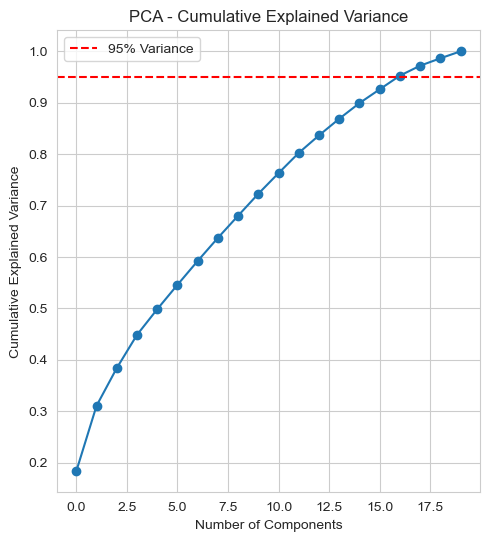

In [95]:
# Figure 1: Cumulative Explained Variance
plt.subplot(1, 2, 1)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_), marker='o')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.legend()
plt.grid(True)

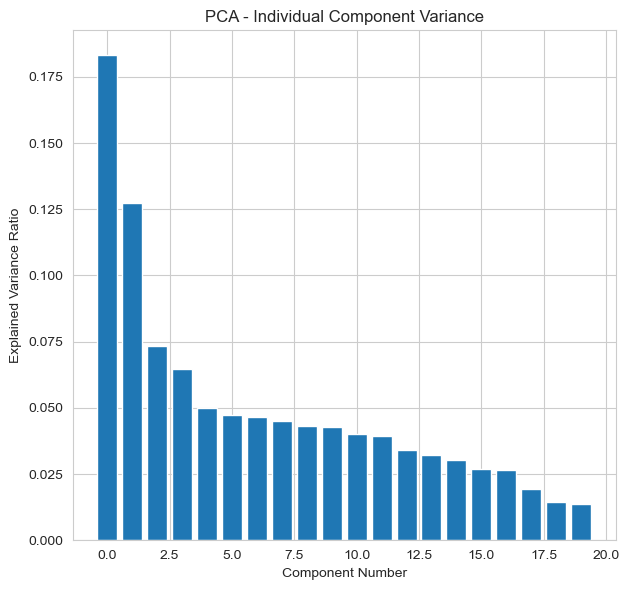

In [96]:
# Figure 2: Individual Component Variance
plt.subplot(1, 2, 2)
plt.bar(range(len(pca_full.explained_variance_ratio_)), pca_full.explained_variance_ratio_)
plt.xlabel('Component Number')
plt.ylabel('Explained Variance Ratio')
plt.title('PCA - Individual Component Variance')
plt.tight_layout()
plt.show()

In [97]:
## PCA Application/Output
pca = PCA(n_components=0.95, random_state=42)
features_pca = pd.DataFrame(pca.fit_transform(features_scaled))

print()
print("Original number of features: {features_scaled.shape[1]}")
print("Reduced number of components: {features_pca.shape[1]}")
print("Variance explained: {sum(pca.explained_variance_ratio_):.2%}")


Original number of features: {features_scaled.shape[1]}
Reduced number of components: {features_pca.shape[1]}
Variance explained: {sum(pca.explained_variance_ratio_):.2%}


## Clustering: K-Means

In [98]:
# Find Optimal K via Elbow Method

In [99]:
# Calculate Inertia
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(features_pca)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_pca, kmeans.labels_))

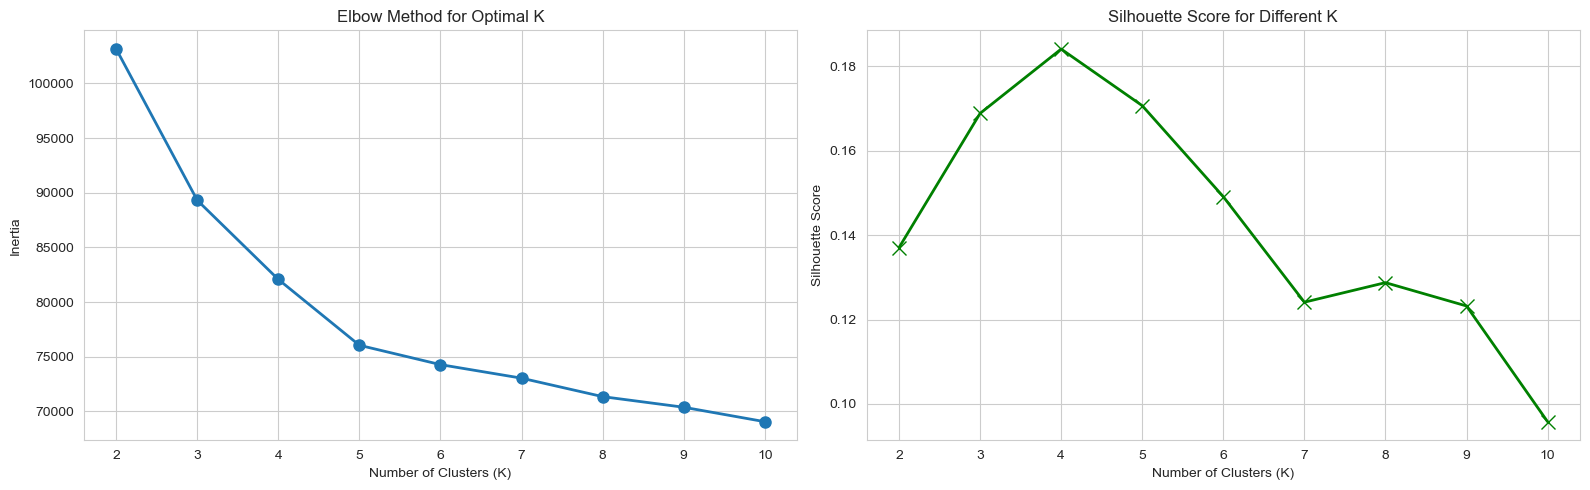


Optimal K is 5
Different K is 2


In [100]:
# Plotting Elbow Method and Silhouette Scores
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Elbow plot
axes[0].plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
axes[0].set_xlabel('Number of Clusters (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].grid(True)

# Silhouette score plot
axes[1].plot(K_range, silhouette_scores, marker='x', linewidth=2, markersize=10, color='green')
axes[1].set_xlabel('Number of Clusters (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score for Different K')
axes[1].grid(True)

plt.tight_layout()
plt.show()

print()
print("Optimal K is 5")
print("Different K is 2")

In [101]:
# K-Means Implementation: Setup
optimal_k = 5

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(features_pca)

# Add cluster labels to our dataframes
features_scaled['KMeans_Cluster'] = kmeans_labels
df_processed['KMeans_Cluster'] = kmeans_labels

# K-Means Cluster Distribution
print()
print("Cluster Distribution")
print(pd.Series(kmeans_labels).value_counts().sort_index())


Cluster Distribution
0    1303
1    1271
2    1296
3     703
4    1057
Name: count, dtype: int64


## Clustering: Algorithmic

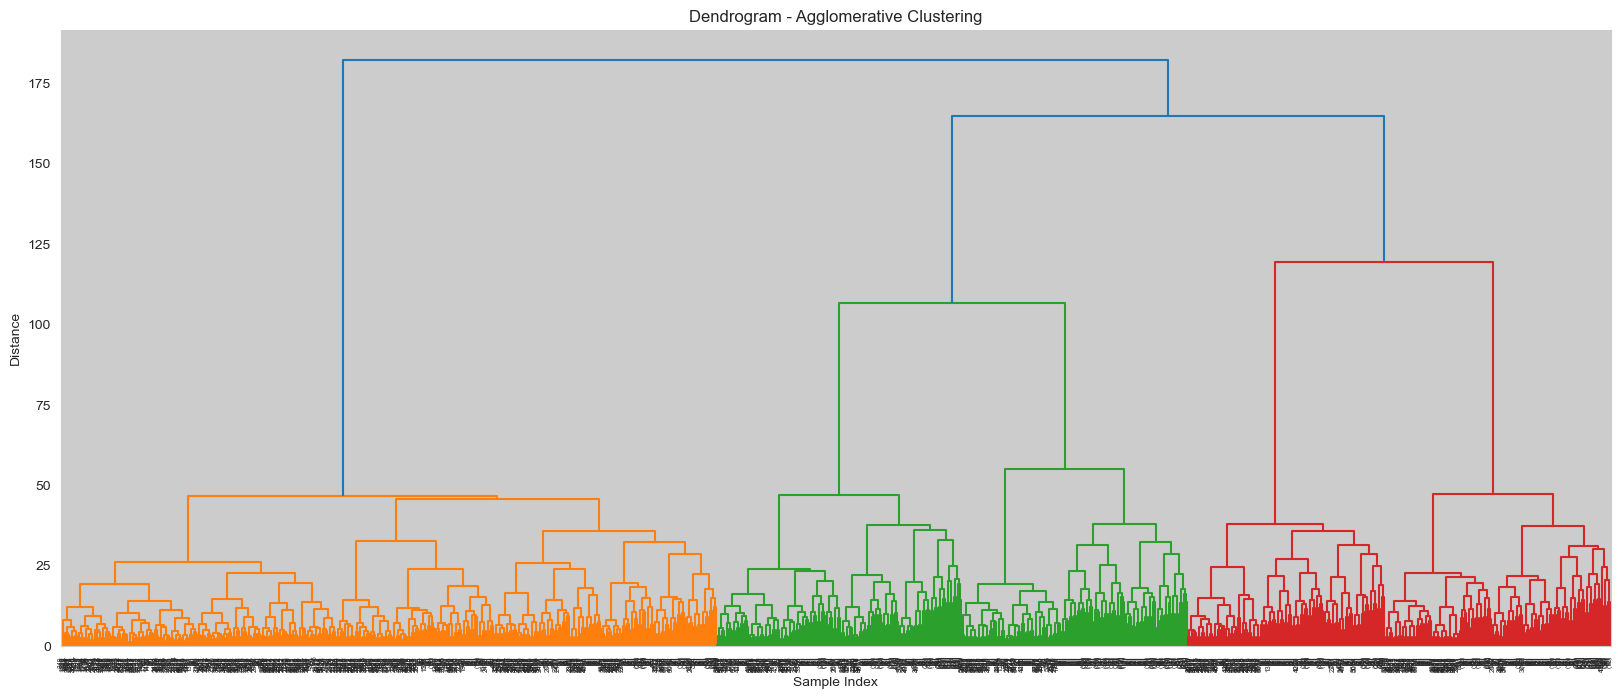


Kinda looks bad
Optimal Number of Clusters is 6


In [102]:
# Identifying Optimal Number of Clusters

# Create dendrogram
plt.figure(figsize=(20, 8))
plt.title("Dendrogram - Agglomerative Clustering")

dendrogram = shc.dendrogram(
    shc.linkage(features_pca, method='ward'),
    truncate_mode='level',
    p=10
)
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

print()
print("Kinda looks bad")
print("Optimal Number of Clusters is 5")

In [103]:
# Algorithmic Clustering Implementation


In [105]:
n_clusters_agglo = 5

agglo = AgglomerativeClustering(n_clusters=n_clusters_agglo, linkage='ward')
agglo_labels = agglo.fit_predict(features_pca)

# Cluster labels
features_scaled['Agglo_Cluster'] = agglo_labels
df_processed['Agglo_Cluster'] = agglo_labels

print()
print("Agglomerative Cluster Distribution:")
print(pd.Series(agglo_labels).value_counts().sort_index())



Agglomerative Cluster Distribution:
0    1022
1    1297
2    1237
3     728
4    1346
Name: count, dtype: int64
